# Lab 1 Analysis Example using Thicket

In [16]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [17]:
tk = th.Thicket.from_caliperreader(glob("*random.cali")) # dividing it by input type for now
tk.statsframe.dataframe["time"] = 1

In [18]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 comm
└─ 1.000 comm_large
   └─ 1.000 cudaMemcpy
1.000 comp
└─ 1.000 comp_large
1.000 correctness_check
1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [19]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'comm', 'type': 'function'}              140327021     3   
                                                  191322871     3   
                                                  374195746     3   
                                                  2187979912    3   
                                                  2204706642    3   
                                                  3547712491    3   
                                                  3707441980    3   
{'name': 'comm_large', 'type': 'function'}        140327021     4   
                                                  191322871     4   
                                                  374195746     4   
                                                  2187979912    4   
                                                  2204706642    4   
                                                  3547712491    4   
                                                  3707441980    4   
{'name': 'cudaMemcpy', 'type': 'function'}        140327021     5   
                                                  191322871     5   
                                                  374195746     5   
                                                  2187979912    5   
                                                  2204706642    5   
                                                  3547712491    5   
                                                  3707441980    5   
{'name': 'comp', 'type': 'function'}              140327021     7   
                                                  191322871     7   
                                                  374195746     7   
                                                  2187979912    7   
                                                  2204706642    7   
                                                  3547712491    7   
                                                  3707441980    7   
{'name': 'comp_large', 'type': 'function'}        140327021     8   
                                                  191322871     8   
                                                  374195746     8   
                                                  2187979912    8   
                                                  2204706642    8   
                                                  3547712491    8   
                                                  3707441980    8   
{'name': 'correctness_check', 'type': 'function'} 140327021    10   
                                                  191322871    10   
                                                  374195746    10   
                                                  2187979912   10   
                                                  2204706642   10   
                                                  3547712491   10   
                                                  3707441980   10   
{'name': 'data_init', 'type': 'function'}         140327021     1   
                                                  191322871     1   
                                                  374195746     1   
                                                  2187979912    1   
                                                  2204706642    1   
                                                  3547712491    1   
                                                  3707441980    1   

                                                               spot.channel  \
node                                              profile                     
{'name': 'comm', 'type': 'function'}              140327021   regionprofile   
                                                  191322871   regionprofile   
                                                  374195746   regionprofile   
                                                  2187979912  regionprofile   
                                                  2204706642  region

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [20]:
tk.metadata

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:cuda.gputime,spot:node.order,spot:output,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_threads,num_blocks,group_num,implementation_source,num_procs
profile,,,,,,,,,,,,,,,,,,,,,,,,,
140327021,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v1048576-random.cali,1700096609,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./counting_sort_cuda, 128, 1048576, random]",g,CountSort,CUDA,int,4,1048576,random,128,8192,19,Handwritten & Online Source: Used Lab 3 as ske...,1.0
191322871,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v65536-random.cali,1700085295,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./counting_sort_cuda, 64, 65536, random]",g,CountSort,CUDA,int,4,65536,random,64,1024,1,Handwritten,NaN
374195746,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t128-v65536-random.cali,1700085295,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./counting_sort_cuda, 128, 65536, random]",g,CountSort,CUDA,int,4,65536,random,128,512,1,Handwritten,NaN
2187979912,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t256-v1048576-random.cali,1700104778,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./counting_sort_cuda, 256, 1048576, random]",g,CountSort,CUDA,int,4,1048576,random,256,4096,19,Handwritten & Online Source: Used Lab 3 as ske...,1.0
2204706642,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t512-v1048576-random.cali,1700096640,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./counting_sort_cuda, 512, 1048576, random]",g,CountSort,CUDA,int,4,1048576,random,512,2048,19,Handwritten & Online Source: Used Lab 3 as ske...,1.0
3547712491,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t1024-v1048576-random.cali,1700096640,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./counting_sort_cuda, 1024, 1048576, random]",g,CountSort,CUDA,int,4,1048576,random,1024,1024,19,Handwritten & Online Source: Used Lab 3 as ske...,1.0
3707441980,2.11.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"cuda.gputime,node.order",regionprofile,spot,true,true,t64-v1048576-random.cali,1700096609,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./counting_sort_cuda, 64, 1048576, random]",g,CountSort,CUDA,int,4,1048576,random,64,16384,19,Handwritten & Online Source: Used Lab 3 as ske...,1.0


In [21]:
gb = tk.groupby("InputSize")

2  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ab62c6fa670>, 1048576: <thicket.thicket.Thicket object at 0x2ab62c6f3730>}


Compose these 3 groups column-wise to get a holistic view of the data

In [22]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_threads"
)

In [23]:
ctk.dataframe

65536  \
                                                                nid   
node                                              num_threads         
{'name': 'comm', 'type': 'function'}              64              3   
                                                  128             3   
                                                  256          <NA>   
                                                  512          <NA>   
                                                  1024         <NA>   
{'name': 'comm_large', 'type': 'function'}        64              4   
                                                  128             4   
                                                  256          <NA>   
                                                  512          <NA>   
                                                  1024         <NA>   
{'name': 'cudaMemcpy', 'type': 'function'}        64              5   
                                                  128             5   
                                                  256          <NA>   
                                                  512          <NA>   
                                                  1024         <NA>   
{'name': 'comp', 'type': 'function'}              64              7   
                                                  128             7   
                                                  256          <NA>   
                                                  512          <NA>   
                                                  1024         <NA>   
{'name': 'comp_large', 'type': 'function'}        64              8   
                                                  128             8   
                                                  256          <NA>   
                                                  512          <NA>   
                                                  1024         <NA>   
{'name': 'correctness_check', 'type': 'function'} 64             10   
                                                  128            10   
                                                  256          <NA>   
                                                  512          <NA>   
                                                  1024         <NA>   
{'name': 'data_init', 'type': 'function'}         64              1   
                                                  128             1   
                                                  256          <NA>   
                                                  512          <NA>   
                                                  1024         <NA>   

                                                                              \
                                                                spot.channel   
node                                              num_threads                  
{'name': 'comm', 'type': 'function'}              64           regionprofile   
                                                  128          regionprofile   
                                                  256                    NaN   
                                                  512                    NaN   
                                                  1024                   NaN   
{'name': 'comm_large', 'type': 'function'}        64           regionprofile   
                                                  128          regionprofile   
                                                  256                    NaN   
                                                  512                    NaN   
                                                  1024                   NaN   
{'name': 'cudaMemcpy', 'type': 'function'}        64           regionprofile   
                                                  128          regionprofile   
                                                  256                    NaN   
                                                  512                    NaN   
   

Perform pandas operations to get the table in a desirable format for plotting

In [24]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (1048576, "nid"), (1048576, "spot.channel")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
ctk.dataframe

65536                                 \
                                  nid   spot.channel Min time/rank   
name              num_threads                                        
comm              64                3  regionprofile      0.000292   
                  128               3  regionprofile      0.000294   
                  256            <NA>            NaN           NaN   
                  512            <NA>            NaN           NaN   
                  1024           <NA>            NaN           NaN   
comm_large        64                4  regionprofile      0.000227   
                  128               4  regionprofile      0.000234   
                  256            <NA>            NaN           NaN   
                  512            <NA>            NaN           NaN   
                  1024           <NA>            NaN           NaN   
cudaMemcpy        64                5  regionprofile      0.000191   
                  128               5  regionprofile      0.000180   
                  256            <NA>            NaN           NaN   
                  512            <NA>            NaN           NaN   
                  1024           <NA>            NaN           NaN   
comp              64                7  regionprofile      0.000195   
                  128               7  regionprofile      0.000192   
                  256            <NA>            NaN           NaN   
                  512            <NA>            NaN           NaN   
                  1024           <NA>            NaN           NaN   
comp_large        64                8  regionprofile      0.000180   
                  128               8  regionprofile      0.000179   
                  256            <NA>            NaN           NaN   
                  512            <NA>            NaN           NaN   
                  1024           <NA>            NaN           NaN   
correctness_check 64               10  regionprofile      0.000194   
                  128              10  regionprofile      0.000187   
                  256            <NA>            NaN           NaN   
                  512            <NA>            NaN           NaN   
                  1024           <NA>            NaN           NaN   
data_init         64                1  regionprofile      0.001586   
                  128               1  regionprofile      0.001620   
                  256            <NA>            NaN           NaN   
                  512            <NA>            NaN           NaN   
                  1024           <NA>            NaN           NaN   

                                                                      \
                              Max time/rank Avg time/rank Total time   
name              num_threads                                          
comm              64               0.000292      0.000292   0.000292   
                  128              0.000294      0.000294   0.000294   
                  256                   NaN           NaN        NaN   
                  512                   NaN           NaN        NaN   
                  1024                  NaN           NaN        NaN   
comm_large        64               0.000227      0.000227   0.000227   
                  128              0.000234      0.000234   0.000234   
                  256                   NaN           NaN        NaN   
                  512                   NaN           NaN        NaN   
                  1024                  NaN           NaN        NaN   
cudaMemcpy        64               0.000191      0.000191   0.000191   
                  128              0.000180      0.000180   0.000180   
                  256                   NaN           NaN        NaN   
                  512                   NaN           NaN        NaN   
                  1024                  NaN           NaN        NaN   
comp              64               0.000195      0.000195   0.000195   
 

In [34]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
processes = sorted(list(set(ctk.dataframe.index.get_level_values("num_threads"))))
print(processes)
array_sizes = [65536, 262144, 1048576] # append as necessary
print(array_sizes)

{'data_init', 'comm', 'correctness_check', 'cudaMemcpy', 'comp_large', 'comm_large', 'comp'}
[64, 128, 256, 512, 1024]
[65536, 262144, 1048576]


In [31]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    
    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Min GPU time/rank", "Max GPU time/rank", "Avg GPU time/rank"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    plt.show()
    return fig, ax

In [35]:
print(ctk.dataframe.loc["comm"][1048576])

             Min time/rank  Max time/rank  Avg time/rank  Total time  \
num_threads                                                            
64                0.001971       0.001971       0.001971    0.001971   
128               0.001469       0.001469       0.001469    0.001469   
256               0.001746       0.001746       0.001746    0.001746   
512               0.001435       0.001435       0.001435    0.001435   
1024              0.001524       0.001524       0.001524    0.001524   

             Avg GPU time/rank  Min GPU time/rank  Max GPU time/rank  \
num_threads                                                            
64                    0.000925           0.000925           0.000925   
128                   0.000763           0.000763           0.000763   
256                   0.000887           0.000887           0.000887   
512                   0.000761           0.000761           0.000761   
1024                  0.000756           0.000756           0.0

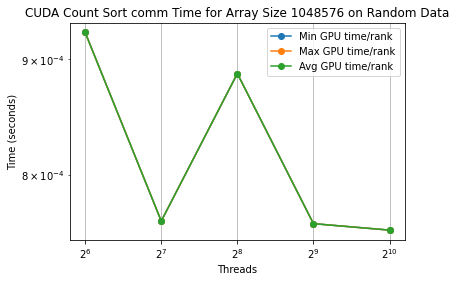

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'CUDA Count Sort comm Time for Array Size 1048576 on Random Data'}, xlabel='Threads', ylabel='Time (seconds)'>)

In [36]:
name = "comm"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][arraySize]["Min GPU time/rank"],
        ctk.dataframe.loc[name][arraySize]["Max GPU time/rank"],
        ctk.dataframe.loc[name][arraySize]["Avg GPU time/rank"]
        ], 
    title="CUDA Count Sort {} Time for Array Size {} on Random Data".format(name, arraySize),
    xlabel="Threads",
    ylabel="Time (seconds)",
)